In [ ]:
from google import genai
from google.genai import types

In [ ]:
# Configure the client
client = genai.Client()

In [ ]:
# Define the grounding tool
search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

In [ ]:
# Configure generation settings
config = types.GenerateContentConfig(
    tools=[search_tool]
)

In [ ]:
# Make the request
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents="Which company had higher revenues in 2024? Uber or Lyft?",
    config=config,
)

In [12]:
# Print the grounded response
print(response.text)

In 2024, Uber had significantly higher revenues than Lyft. Uber generated $43.9 billion in revenue, while Lyft's revenue for the same year was approximately $5.7 billion.


In [13]:
image_model_name = "gemini-2.5-flash-image-preview"

In [14]:
image_generated = client.models.generate_content(
      model=image_model_name,
      contents=[f"Given the information in {response.text} generate a graph in the style of an excel chart."],
  )

Here's an Excel-style chart comparing Uber and Lyft's 2024 revenues:




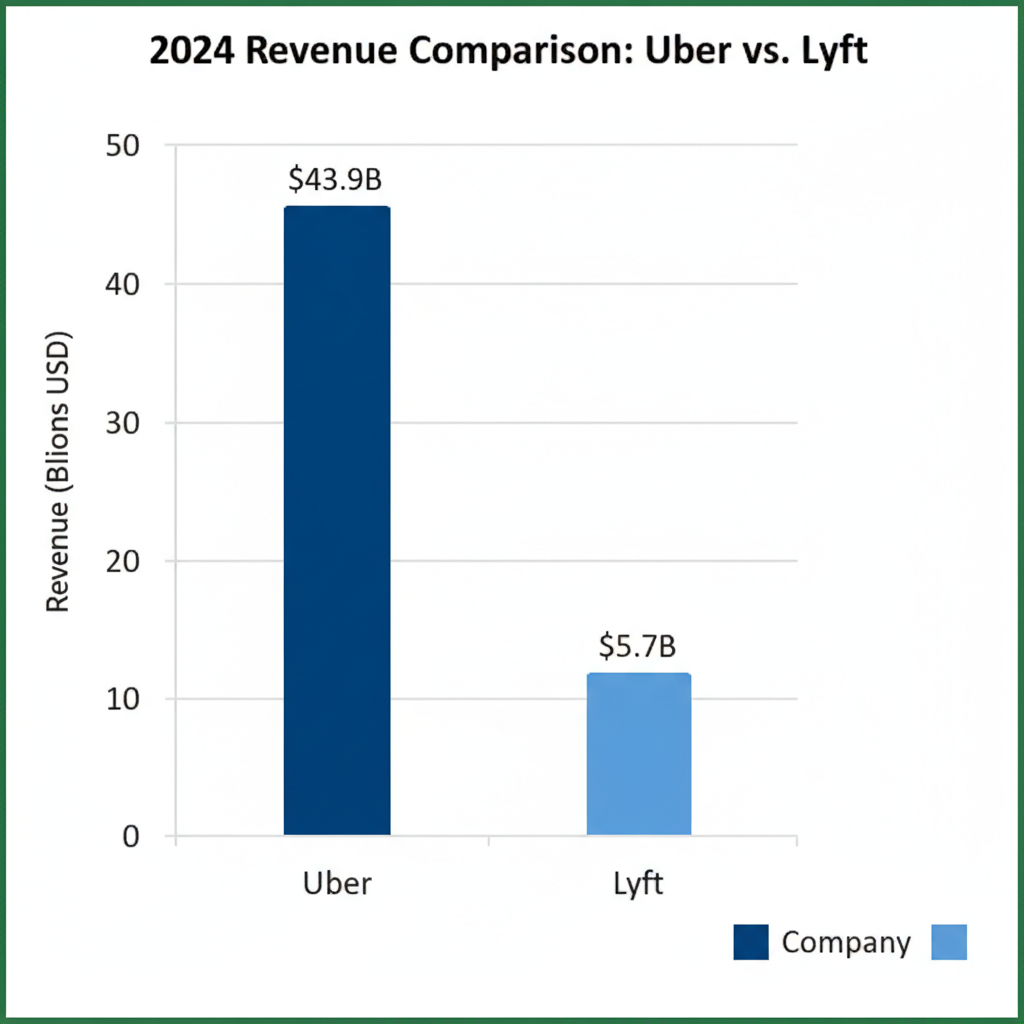

In [15]:
from PIL import Image
from io import BytesIO
for part in image_generated.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        display(image)
        # image.save("chart.png")